# Using NLP Techniques to Predict Song Skip on Spotify based on sequential user and Acoustic data

  ## Introduction

Music consumption habits have changed dramatically with the rise of streaming services like Spotify, Apple Music, and Tidal. The skip button plays a large role in the user’s experience, as they are free to abandon songs as they choose. Music roviders are also incentivized to recommend songs that their users like in order to increase user experience and time spent on the platform.
  
Machine learning in the context of music often uses recommender system.There hasn’t been much research on how a user’s teraction with music over time can help recommend music to the use.


  ## Team Introduction

| Name | Role | email
| --- | --- | --- |
| Yasin Shaw | Internship Mentor | shahyaseen71@gmail.com
| Fahd Ashraf | Team Leader/ Data preprocessing | fahd.ashrf.ramadan@gmail.com
| Mustafa Shalatah | Flask deployment | Mustafa.shalata@gmail.com
| Mustafa Ezzali | Django deployment | mustapha_ezzali@um5.ac.ma
| Himanshu Nakrani  | Model Impelmentation | himanshunakrani0@gmail.com

  ## Preprocessing Data
  
Data preprocessing in Machine Learning is a crucial step that helps enhance the quality of data to promote the extraction of meaningful insights from the data. Data preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models. In simple words, data preprocessing in Machine Learning is a data mining technique that transforms raw data into an understandable and readable format. 

### 1.a. Data documentation

 - **session log dataset**:

The schema for the session logs is given below. Each row corresponds to the playback of one track, and has the following fields, with corresponding values :

  | Field |Values  |
  |--|--|
  |session_id|E.g. ​ 65_283174c5-551c-4c1b-954b cb60ffcc2aec - unique identifier for the session that this row is a part of  |
  |session_position | {1-20} - position of row within session |
  |session_length|{10-20} - number of rows in session|
  |track_id_clean  |E.g. ​ t_13d34e4b-dc9b-4535-963d-419afa8332ec - unique identifier for the track played. This islinked with track_id in the track features and metadata table.  |
  |skip_1|Boolean indicating if the track was only played very briefly|
  |skip_2|Boolean indicating if the track was only played briefly|
  |skip_3|Boolean indicating if most of the track was played  |
  |not_skipped|Boolean indicating that the track was playedin its entirety  |
  |context_switch|Boolean indicating if the user changed context between the previous row and the current row. This could for example occur if the user switched from one playlist to another|
  |no_pause_before_play|Boolean indicating if there was no pause between playback of the previous track andthis track|
  |short_pause_before_play|Boolean indicating if there was a short pause between playback of the previous track and this track|
  |long_pause_before_play|Boolean indicating if there was a long pause between playback of the previous track and this track|
  |hist_user_behavior_n_seekfwd|Number of times the user did a seek forward within track|
  |hist_user_behavior_n_seekback|Number of times the user did a seek back within track|
  |hist_user_behavior_is_shuffle|Boolean indicating if the user encountered this track while shuffle mode was activated|
  |hour_of_day|{0-23} - The hour of day|
  |date|E.g. 2018-09-18 - The date|
  |premium|Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.|
  |context_type|E.g. ​ editorial playlist - ​ what type of context the playback occurred within|
  |hist_user_behavior_reason_start|E.g. ​ fwdbtn​ - the user action which led to the current track being played|
  |hist_user_behavior_reason_end|E.g. ​ trackdone​ - the user action which led to the current track playback ending|

  - **track features dataset**:

The schema for the track metadata and features is given below, each row has the following  fields, with corresponding values:

| Field|Values|
|--|--|
|track_id|E.g. ​ t_13d34e4b-dc9b-4535-963d- 19afa8332ec- unique identifier for the track played. This is linked with track_id_clean in the session logs|
|duration|Length of track in seconds|
|release_year|Estimate of year the track was released|
|us_popularity_estimate|Estimate of the US popularity percentile of the track as of October 12, 2018 |
|acousticness|See https://developer.spotify.com/documentation/ web-api/reference/tracks/get-audio-features/|
|beat_strength|See acousticness|
|bounciness|See acousticness|
|danceability|See acousticness|
|dyn_range_mean|See acousticness|
|energy|See acousticness|
|flatness|See acousticness|
|instrumentalness|See acousticness|
|key|See acousticness|
|liveness|See acousticness|
|loudness|See acousticness|
|mechanism|See acousticness|
|mode|See acousticness|
|organism|See acousticness|
|speechiness|See acousticness|
|time_signature|See acousticness|
|valence|See acousticness|
|acoustic_vector_0|See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-|
|acoustic_vector_1|See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-|
|acoustic_vector_2|See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-|
|acoustic_vector_3|See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-|
|acoustic_vector_4|See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-|
|acoustic_vector_5|See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-|
|acoustic_vector_6|See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-|
|acoustic_vector_7|See ​http://benanne.github.io/2014/08/05/spotify-cnns.html​ and http://papers.nips.cc/paper/5004-deep-content-based-|

### 1.a. Data wrangling

In [1]:
#importing necessary libarary and data 
import pandas as pd
import numpy as np 
track_data = pd.read_csv('tf_mini.csv')
session_data = pd.read_csv('log_mini.csv')

In [2]:
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [3]:
session_data.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [4]:
#data assess
#we will start by combining the two datasets 
#we will be merging on track id and track id clean
combined_data = session_data.merge(track_data,left_on='track_id_clean',right_on='track_id')
#we should check for inconsistent types 
combined_data.dtypes

session_id                          object
session_position                     int64
session_length                       int64
track_id_clean                      object
skip_1                                bool
skip_2                                bool
skip_3                                bool
not_skipped                           bool
context_switch                       int64
no_pause_before_play                 int64
short_pause_before_play              int64
long_pause_before_play               int64
hist_user_behavior_n_seekfwd         int64
hist_user_behavior_n_seekback        int64
hist_user_behavior_is_shuffle         bool
hour_of_day                          int64
date                                object
premium                               bool
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
track_id                            object
duration                           float64
release_yea

we have the date column as a string so we will need to fix that


In [5]:
#checking for duplicates
combined_data.duplicated().sum()

0

we have no duplicates in our dataset 

In [6]:
#check for missing data
combined_data.isna().sum().sum()


0

we have no missing data 

since we found that our data is clean and consistent but for the date column we proceed to fix that column 

In [7]:
#data clean
#we will transform the date column into days of week to figure out if skips are affected by 
#whch day the tracks are played in
combined_data.date=pd.to_datetime(combined_data.date)
daysofweek =[]
for i in combined_data.date:
    daysofweek.append(pd.Timestamp(i).day_name())
combined_data['days_of_week']=daysofweek
combined_data.days_of_week

0           Sunday
1           Sunday
2         Saturday
3           Sunday
4         Saturday
            ...   
167875    Saturday
167876    Saturday
167877    Saturday
167878    Saturday
167879    Saturday
Name: days_of_week, Length: 167880, dtype: object

### 1.b. Data exploration

In [8]:
#importing important libararies
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mode', ylabel='count'>

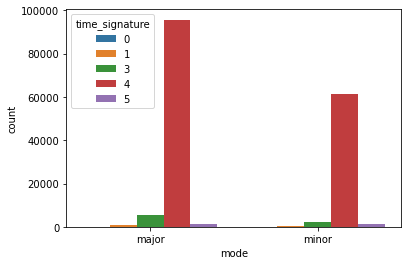

In [9]:
#EDA 
#now we will start our exploratory analysis and figure out which data attributes are important and which are not 
#let us see how the timesignature is involved in making the mode 
sns.countplot(combined_data['mode'],hue=combined_data.time_signature)

most of tracks have a time signature of 4 

<AxesSubplot:xlabel='key', ylabel='us_popularity_estimate'>

C:\Users\fahda\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


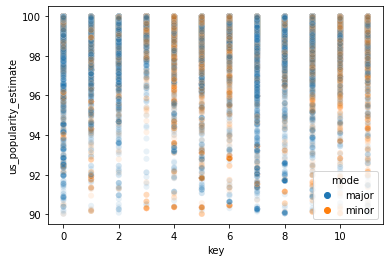

In [10]:
#what is the dominant modes in each key
sns.scatterplot(y= combined_data.us_popularity_estimate,x=combined_data.key,alpha=0.1,hue=combined_data['mode'])

most minor mode are in key 4,5,6,9,10,11

<AxesSubplot:xlabel='duration', ylabel='Count'>

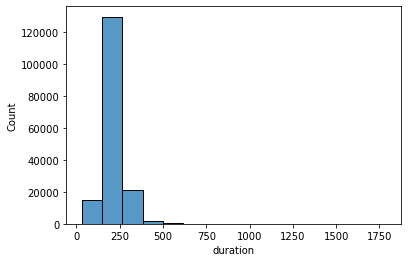

In [11]:
#how does the track length affect the skip
sns.histplot(data=combined_data,x="duration",bins=15)

most from 200 to 300 seconds

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skip_2', ylabel='count'>

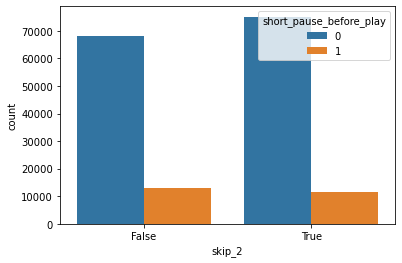

In [12]:
#user behavior when he stops before the song 
sns.countplot(combined_data.skip_2,hue=combined_data.short_pause_before_play)

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skip_2', ylabel='count'>

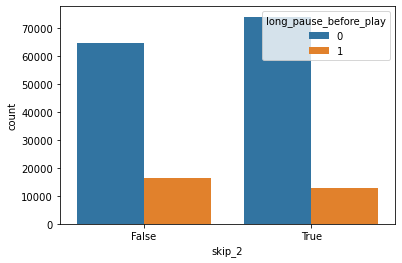

In [13]:
#does having a break before tracks afect whether or not you wi;; skip it 
sns.countplot(combined_data.skip_2,hue=combined_data.long_pause_before_play)

there is no effect whether the user stops a short or long or even does not stop so we will combine the three attributes into one 

C:\Users\fahda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hist_user_behavior_is_shuffle', ylabel='count'>

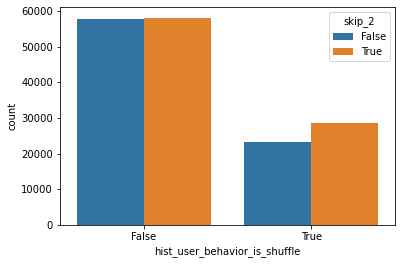

In [14]:
#lets see shuffle effect on the skip  
sns.countplot(combined_data.hist_user_behavior_is_shuffle,hue=combined_data.skip_2)


users who are on shuffle are more likely to skip 

<AxesSubplot:xlabel='duration', ylabel='Count'>

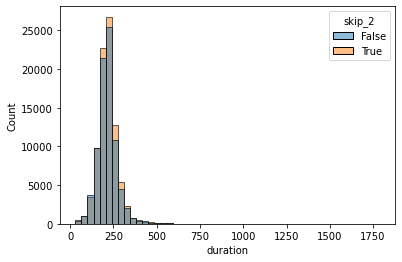

In [15]:
#will the time affect of the track the skip behavior 
sns.histplot(x=combined_data.duration,bins=50,hue = combined_data.skip_2)

we see that skips tend to be alot when the track exceeds 200 seconds in length 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'editorial_playlist'),
  Text(1, 0, 'user_collection'),
  Text(2, 0, 'catalog'),
  Text(3, 0, 'radio'),
  Text(4, 0, 'charts'),
  Text(5, 0, 'personalized_playlist')])

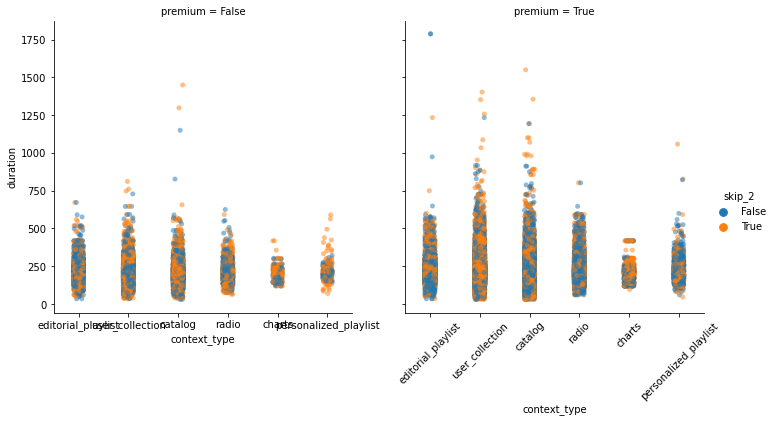

In [16]:
#lets combine 4 attributes to see how does that affect the skip 
sns.catplot(y='duration',x='context_type',data=combined_data,hue = 'skip_2',col='premium',alpha=0.5)
plt.xticks(rotation = 45)

for premium users in the context type more skips happen in user collections and
charts but less skips in editorial playlists,catalog and personalized playlist
how ever for non preimium users more skips happen in catalog,radio and charts 
while less skips happen in editorial playlist user collection


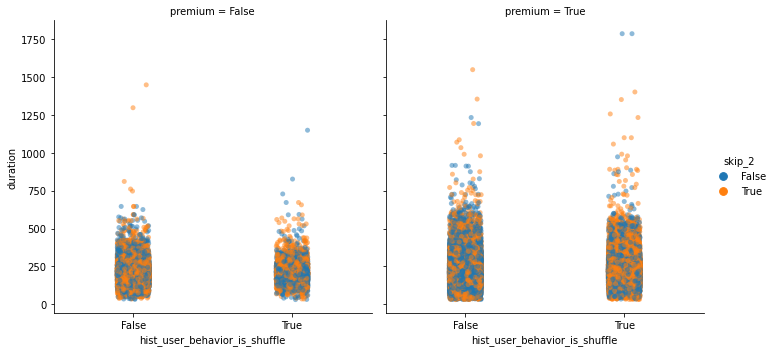

In [17]:
#trying with diffrent attributes so we find more intersting insights
sns.catplot(y='duration',x='hist_user_behavior_is_shuffle',data=combined_data,hue = 'skip_2',col='premium',alpha=0.5)


for preumium users they tend to skip more on shuffle and less when not shuffling but
for non premium usersthey tend to skip when they are not shuffling more than they re on shuffle


so far we have covered most of the important attributes in the next section we will improve our attributes and choose the most important of them because we have a lot of attributes and we do not want to risk overfitting

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
#feature engineering
# in this section we will try as much as we can to limit the number of our attributes

#we figure out that we dont need three skips so we drop them and revert the not skipped col
combined_data['is_skipped'] = ~combined_data.not_skipped
combined_data=combined_data.drop(['skip_1','skip_2','skip_3','not_skipped',
                                'session_id','track_id_clean','track_id'],axis=1)

#converting boolen types into int
boolen_dtypes=['hist_user_behavior_is_shuffle','premium','is_skipped']
combined_data[boolen_dtypes]=combined_data[boolen_dtypes].astype(int)

#changing the relaese year into relaeased from 
combined_data['released_from']=2022 - combined_data['release_year']

#combining the three pauses attributes into one 
combined_data['is_paused_before_play']= ~(combined_data['no_pause_before_play']
                                          .astype(bool))
combined_data['is_paused_before_play']=combined_data['is_paused_before_play'].astype(int)
combined_data=combined_data.drop(['no_pause_before_play','short_pause_before_play',
                   'long_pause_before_play','release_year'],axis = 1)

# we have selected the most important features to train our model with and to ask as inout from the user in our application 
selected_attributes =['context_switch','is_paused_before_play','hist_user_behavior_is_shuffle',
              'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback',
              'released_from','premium',"is_skipped",'session_length','session_position','context_type',
               'hist_user_behavior_reason_start','hist_user_behavior_reason_end',
               'hour_of_day']
final_data = combined_data[selected_attributes]

In [20]:
#lets take a look at the data 
final_data.head()

,context_switch,is_paused_before_play,hist_user_behavior_is_shuffle,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,released_from,premium,is_skipped,session_length,session_position,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hour_of_day
0,0,1,1,0,0,4,1,0,20,1,editorial_playlist,trackdone,trackdone,16
1,0,1,0,0,0,4,1,1,12,7,editorial_playlist,fwdbtn,endplay,17
2,0,1,0,0,0,4,1,0,20,6,user_collection,trackdone,trackdone,21
3,0,0,0,0,0,4,1,0,13,9,editorial_playlist,fwdbtn,trackdone,18
4,0,1,1,0,0,4,0,1,12,7,editorial_playlist,trackdone,fwdbtn,19


we need to extract the target attribute and to convert the three categorical variables 

In [21]:
lencoder = LabelEncoder()

final_data['context_type'] = lencoder.fit_transform(final_data['context_type'])
final_data['hist_user_behavior_reason_start'] = lencoder.fit_transform(final_data['hist_user_behavior_reason_start'])
final_data['hist_user_behavior_reason_end'] = lencoder.fit_transform(final_data['hist_user_behavior_reason_end'])


C:\Users\fahda\AppData\Local\Temp\ipykernel_676\2598299921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['context_type'] = lencoder.fit_transform(final_data['context_type'])
C:\Users\fahda\AppData\Local\Temp\ipykernel_676\2598299921.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['hist_user_behavior_reason_start'] = lencoder.fit_transform(final_data['hist_user_behavior_reason_start'])
C:\Users\fahda\AppData\Local\Temp\ipykernel_676\2598299921.py:5: SettingWithCopyWarning: 
A 

In [22]:
target = combined_data.is_skipped 
final_data.drop('is_skipped',axis = 1 ,inplace = True)

C:\Users\fahda\AppData\Local\Temp\ipykernel_676\902478284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.drop('is_skipped',axis = 1 ,inplace = True)


In [23]:
final_data.head()

,context_switch,is_paused_before_play,hist_user_behavior_is_shuffle,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,released_from,premium,session_length,session_position,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,hour_of_day
0,0,1,1,0,0,4,1,20,1,2,7,6,16
1,0,1,0,0,0,4,1,12,7,2,4,2,17
2,0,1,0,0,0,4,1,20,6,5,7,6,21
3,0,0,0,0,0,4,1,13,9,2,4,6,18
4,0,1,1,0,0,4,0,12,7,2,7,3,19


Now our data is ready to be taken to the next step which is model implementation 

## 2. Machine Learning modeling


#### Metrics considered for Model Evaluation
**Accuracy**: Accuracy simply measures how often the classifier correctly predicts. We can define accuracy as the ratio of the number of correct predictions and the total number of predictions.


 
  ### 2.a. Gradient Boosted Trees (LightGBM)
- LightGBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage.
- The main features of the LGBM model are as follows :
  * Higher accuracy and a faster training speed.
  * Low memory utilization
  * Comparatively better accuracy than other boosting algorithms and handles overfitting much better while working with smaller datasets.
  * Parallel Learning support.
  * Compatible with both small and large datasets

In [24]:
#importing important libararies
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [25]:
#impelement model
X_train, X_test, y_train, y_test = train_test_split(final_data, target, test_size=0.2, random_state=500,shuffle=True)
model_1 = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)

We have intialized our LGBM and trained it using test split 

In [26]:
#model accuracy

score = model_1.score(X_test, y_test)
print("LGBM model Accuracy: " + str(score*100))

LGBM model Accuracy: 99.00226352156302


We have acheived 99% accuracy on the test set now lets move to the next model

  ### 2.b. RNN based Bi-LSTM
- **Bi-LSTM:(Bi-directional long short term memory):**
  - Bidirectional recurrent neural networks(RNN) are really just putting two independent RNNs together. This structure allows the networks to have both backward and forward information about the sequence at every time step.

  - Using bidirectional will run your inputs in two ways, one from past to future and one from future to past and what differs this approach from unidirectional is that in the LSTM that runs backward you preserve information from the future and using the two hidden states combined you are able in any point in time to preserve information from both past and future.


In [30]:
#importing important libararies
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.layers import Bidirectional

we will impelement our neural network from 1 input layer followed by 2 bidirectional layers followed by our output layer

In [ ]:
#impelement model
X_train, X_test, y_train, y_test = train_test_split(final_data,target,random_state =42)
input_shape = X_train.shape[1]
model_2=Sequential()
model_2.add(Bidirectional(LSTM(116,return_sequences=True),input_shape=(input_shape,1)))
model_2.add(Bidirectional(LSTM(116)))
model_2.add(Dense(1,activation = 'sigmoid'))
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=1, batch_size=1000)

#prediction on test set
y_pred = model2.predict(X_test)
from numpy.ma.core import ceil, floor
predicitons =[]
for i in range(pred.shape[0]) :
  if pred[i] >0.5 :
    predicitons.append(int(ceil(pred[i])))
  else : predicitons.append(int(floor(pred[i])))  

In [ ]:
#model accuracy
accuracy = accuracy_score(y_test,predicitons)
print("RNN based Bi-LSTM model Accuracy: " + str(score*100))

We have acheived 99% accuracy on the test set now lets move to deployment the models

## 3. Model Deployment


### 3.a Flask
Flask is a small and lightweight Python web framework that provides useful tools and features that make creating web applications in Python easier. It gives developers flexibility and is a more accessible framework for new developers since you can build a web application quickly using only a single Python file.

we started by bulding the model Bi-LSTM and then trained it on certain 14 features that we believe they are the most effictive and will help our model prediction reach the most.

After traning process we saved this model for pickle format so we can save the model with the trained wieghts.

we bulit after traning the HTML file that suits the project and give friendly user interface.

The last step was to build the slask application that consists of loading the model we built in the pickle formate and bulding prediction function and give an accurate result.

here is the flask app code :

In [ ]:
# import numpy as np
from flask import Flask,request ,jsonify,render_template
import pickle 

# create flask 
app = Flask(__name__)

# load pickle model 
model = pickle.load(open('model.pkl','rb'))

# for haome page
@app.route("/")
def Home():
    return render_template("trial.html")

# for prediction from home page
@app.route("/predict",methods=['POST'])
def predict():
    float_feature = [float(x) for x in request.form.values()]
    features =[np.array(float_feature)]
    prediction = model.predict(features)
    if prediction > 0.5:
        assume = 'skipped'
    else: assume = 'not skipped'    
    return render_template("trial.html",prediction_text ="The track will be {}".format(assume))

if __name__ ==   "__main__":
    app.run(debug=True,use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


And here is the result:

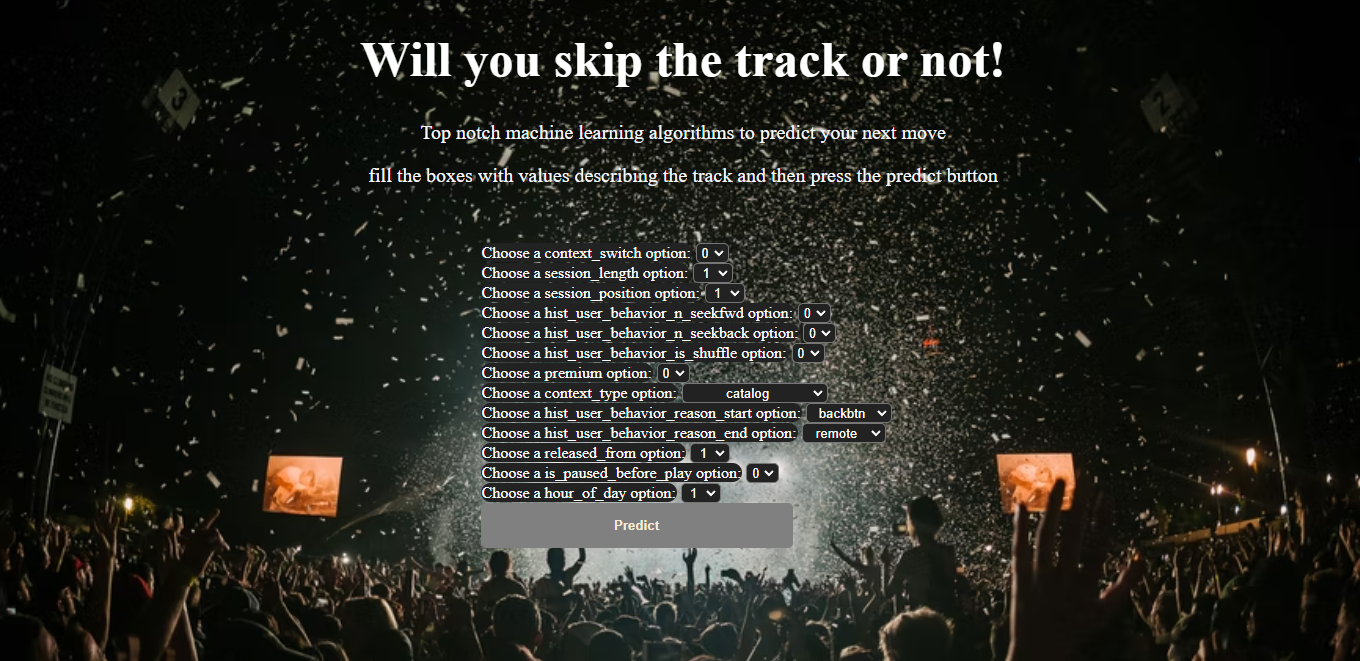

### 3.a Django
Django is a high-level Python web framework that enables rapid development of secure and maintainable websites. Built by experienced developers, Django takes care of much of the hassle of web development, so you can focus on writing your app without needing to reinvent the wheel

The Template is a presentation layer which handles User Interface part completely. The View is used to execute the business logic and interact with a model to carry data and renders a template.

Although Django follows MVC pattern but maintains it?s own conventions. So, control is handled by the framework itself.

There is no separate controller and complete application is based on Model View and Template. That?s why it is called MVT application.

See the following graph that shows the MVT based control flow. the django framework is based on the architechture Model-View-Template

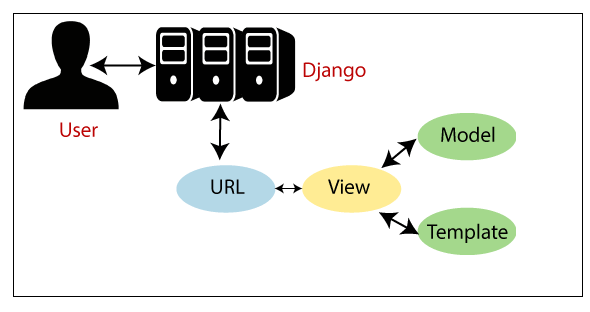

Here, a user requests for a resource to the Django, Django works as a controller and check to the available resource in URL.

If URL maps, a view is called that interact with model and template, it renders a template.

Django responds back to the user and sends a template as a response.